In [4]:
import pandas as pd 

# import and show data 
salaries = pd.read_csv("ds_salaries.csv")
salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


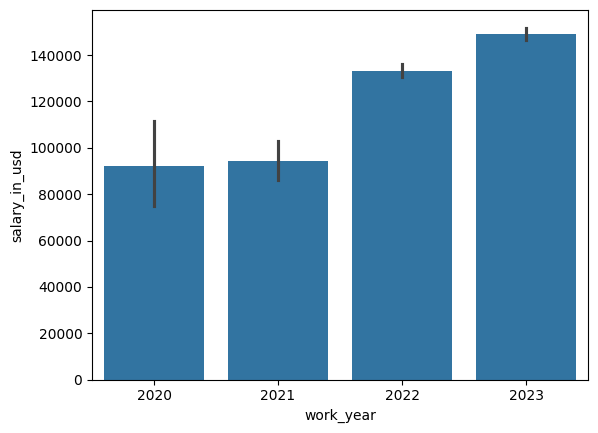

In [5]:
# Use bar or line charts to compare trends in wages, dollar wages, and other indicators over different years

import matplotlib.pyplot as plt 
import seaborn as sns

# Bar chart classified by working years
sns.barplot(
    x = 'work_year',
    y = 'salary_in_usd',
    data = salaries
)
plt.show()

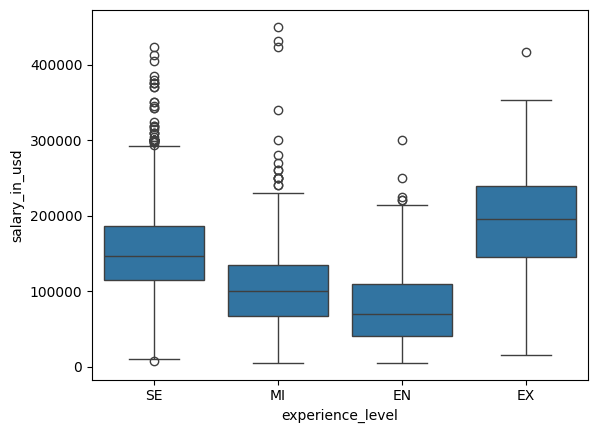

In [6]:
# Boxplots classified by experience level

sns.boxplot(
    x = 'experience_level',
    y = 'salary_in_usd', 
     data=salaries
)
plt.show()

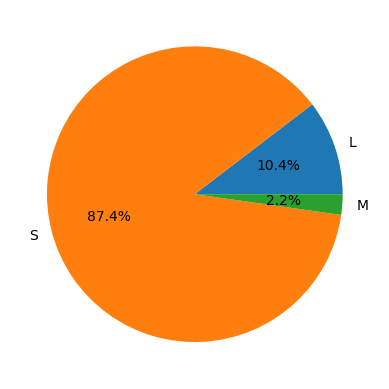

In [10]:
# Pie chart by employment type

plt.pie(
    salaries['salary_in_usd'].groupby(salaries['company_size']).sum(),
    labels = salaries['company_size'].unique(),
    autopct = '%1.1f%%'
)
plt.show()

C:\Users\fairy\AppData\Local\Temp\ipykernel_18876\3501552058.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path('naturalearth_lowres')


ValueError: aspect must be finite and positive 

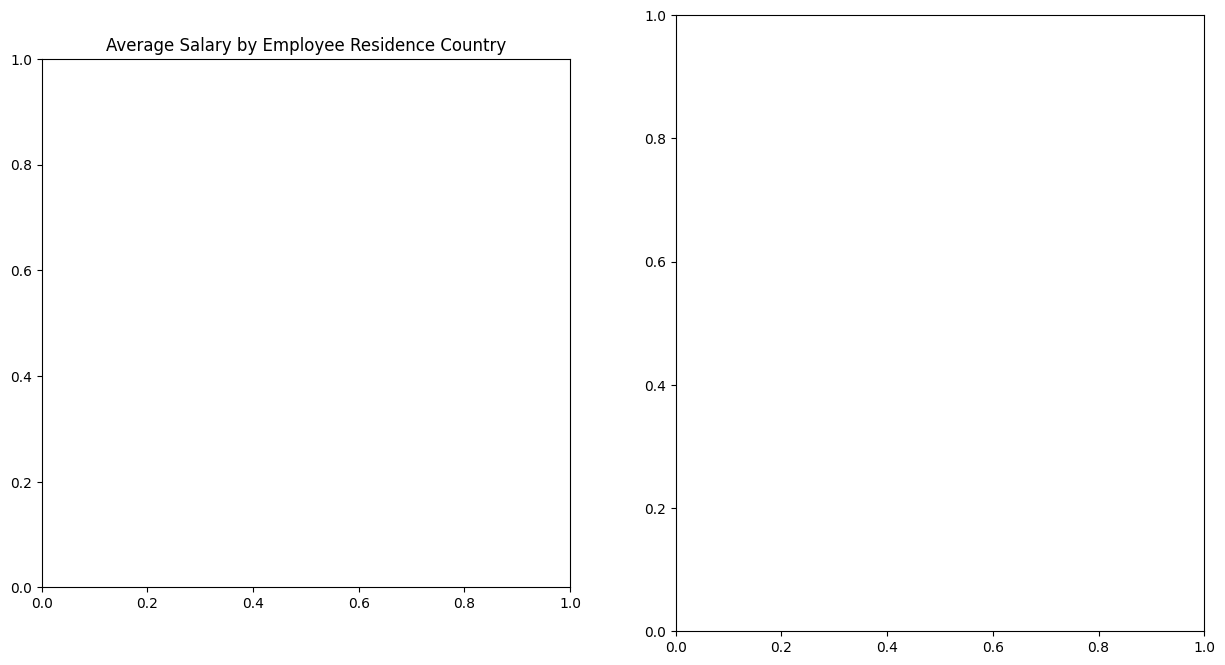

In [22]:
import geopandas as gpd 
import matplotlib.pyplot as plt

def equal_aspect_ratio(ax):
    # Set equal aspect ratio for a GeoAxes.
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    ratio = (ylim[1] - ylim[0]) / (xlim[1] - xlim[0])
    ax.set_aspect(ratio, adjustable = 'box')

# Sample world countries bordery dataset
worldmap = gpd. read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

# Merge company location data with the eorld map data
company_merge = worldmap.merge(
    salaries,
    left_on = 'name',
    right_on = 'company_location'
)

# Creat a canvas with two subplots
fig, (ax1, ax2) = plt.subplots(
    1,
    2,
    figsize = (15, 8)
)

equal_aspect_ratio(ax1)

# Merge employee residence data with the world map data
employee_merge = worldmap.merge(
    salaries,
    left_on = 'name',
    right_on = 'employee_residence'
)

ax1.set_title(
    'Average Salary by Employee Residence Country'
)

# Plot the map for company locations
company_merge.plot(
    column = 'salary_in_usd',
    cmap = 'Blues',
    linewidth = 0.8,
    ax = ax1,
    edgecolor = '0.8',
    legend = True
)

equal_aspect_ratio(ax2)

# Plot the map for employee residence locations

employee_merge.plot(
    column = 'salary_in_usd',
    cmap = 'Oranges',
    linewidth = 0.8,
    ax = ax2,
    edgecolor = '0.8',
    legend = True
)

ax2.set_title(
    'Average Salary by Employee Residence Country'
)

'''# Get the coordinate range of the company location map

xlim, ylim = ax1.get_xlim(), ax1.get_ylim()

# Adjust the overall layout and set the aspect ratio
plt.gca().set_aspect(
    'equal',
    adjustable = 'box'
) # Set the aspect ratio for the entire figure

ax2.set_aspect(
    'equal'
)

ax2.set_xlim(xlim)
ax2.set_ylim(ylim)'''

plt.tight_layout(pad=3.0)

plt.show()